<h1> <center> Khadim Hussain <center><h1>
<h1> <center> 19-CP-71 <center><h1>
<h1> <center> DIP LAB 06<center><h1>

# Examples

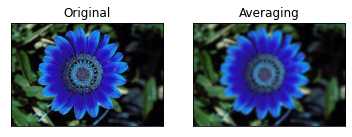

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np 
from matplotlib import pyplot as plt
img = cv2.imread('/content/flower.jpg')
kernel = np.ones((5,5),np.float32)/25
dst =cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()
# dst

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('/content/flower.jpg')
blur = cv2.blur(img,(5,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
blur = cv2.GaussianBlur(img,(5,5),0)
plt.imshow(blur)

In [ ]:
median = cv2.medianBlur(img,5)
plt.imshow(median)



In [ ]:
blur = cv2.bilateralFilter(img,10,90,70)
plt.imshow(blur)


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np# Reading in and displaying our image
image = cv2.imread('/content/flower.jpg',0)
print('original')
cv2_imshow(image)# Create our shapening kernel, it must equal to one
# eventually
kernel_sharpening = np.array([[-1,-1,-1],[-1, 9,-1],[-1,-1,-1]])# applying the sharpening kernel to the
# input image & displaying it.
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
print('Sharpened')

cv2_imshow(sharpened)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Task 01
Take your own image, add Gaussian noise and salt and pepper noise, compare
the effect of blurring via box, Gaussian, median and bilateral filters
for both noisy images, as you change the level of noise.

In [ ]:
import cv2
import numpy as np# Reading in and displaying our image
from google.colab.patches import cv2_imshow
# Open the image.
img = cv2.imread('/content/flower.jpg', cv2.IMREAD_GRAYSCALE)
# Apply log transform.
print('original')
cv2_imshow(img)
def noisy(noise_typ,image):
   if noise_typ == "gauss":
      row,col= image.shape
      mean = 0
      var = 0.5
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col))
      gauss = gauss.reshape(row,col)
      noisy = image + gauss
      return noisy
   elif noise_typ == "s&p":
      row,col = image.shape
      s_vs_p = 0.5
      amount = 0.004
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 255

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out
gaussImg = noisy("s&p",img)
cv2_imshow(gaussImg)
spImg = noisy("gauss",img)
cv2_imshow(spImg)
kernel = np.ones((5,5),np.float32)/25
dstGuass = cv2.filter2D(gaussImg,-1,kernel)
cv2_imshow(dstGuass)
dstBox = cv2.filter2D(gaussImg,-1,kernel)
cv2_imshow(dstBox)
print()
median = cv2.medianBlur(gaussImg,5)
print('Median on Guass noise')
cv2_imshow(median)
print()
median2 = cv2.medianBlur(spImg,5)
print('Median on s&p noise')
cv2_imshow(median2)
print()
blur = cv2.bilateralFilter(gaussImg,9,75,75)
print('Bilateral noise on Guass')
cv2_imshow(blur)
print()
blur = cv2.bilateralFilter(spImg,9,75,75)
print('Bilateral noise on s&p')
cv2_imshow(blur)




In [ ]:
from numpy.core.memmap import uint8
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


from skimage.util import random_noise
img = cv2.imread('/content/flower.jpg', cv2.IMREAD_GRAYSCALE)

s_p_img=random_noise(img,mode='s&p',amount=0.1)
s_p_img=np.array(255*s_p_img,dtype="uint8")
g_img=random_noise(img, mode='gaussian', seed=None)
g_img=np.array(255*s_p_img,dtype="uint8")
print('original')
cv2_imshow(img)

print('Salt and pepppr')
cv2_imshow(s_p_img)
print('Gaussain_noise')

cv2_imshow(g_img)

print('average filter s&p')
blur = cv2.blur(s_p_img,(5,5))
cv2_imshow(blur)
print('average filter')
blur = cv2.blur(g_img,(5,5))
cv2_imshow(blur)

print('median filter s&p')
median = cv2.medianBlur(s_p_img,5)
cv2_imshow(blur)
print('median filter')
median = cv2.medianBlur(g_img,5)
cv2_imshow(blur)

print('bilateralFilter filter s&p')
blur = cv2.bilateralFilter(s_p_img,10,90,70)
cv2_imshow(blur)
print('bilateralFilter filter')
blur = cv2.bilateralFilter(g_img,10,90,70)
cv2_imshow(blur)

print('guassain filter s&p')
blur = cv2.GaussianBlur(s_p_img,(5,5),0)
cv2_imshow(blur)
print('guassain filter')
blur = cv2.GaussianBlur(g_img,(5,5),0)
cv2_imshow(blur)



# Task 02
Apply Laplacian, Prewitt, Sobel, Robinson and Kirsch masks on
laplacian.jpg and your own image and interpret the results and compare
and analyze the effects of different masks.

In [ ]:
import cv2
import numpy as np# Reading in and displaying our image
from google.colab.patches import cv2_imshow
# Open the image.
img = cv2.imread('/content/flower.jpg', cv2.IMREAD_GRAYSCALE)
# Apply log transform.
print("0riginal")
cv2_imshow(img)
kernel_sharpening = np.array([[0,1,0], [1, -4,1], [0,1,0]])# applying the sharpening kernel to the 
sharpened = cv2.filter2D(img, -1, kernel_sharpening)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
prewit = ndimage.prewitt(img)

print('laplacian using function')
cv2_imshow(laplacian)
print('laplacian using filter 2D ')
cv2_imshow(sharpened)
print('sobel ')
cv2_imshow(sobelx)
print("prewit")
cv2_imshow(prewit)

cv2.waitKey(0)
cv2.destroyAllWindows()


# Task 03
Write a Python program to apply a mean filter on an image with salt- andpepper noise. Describe the output, including the mean filter’s ability to
remove the noise.


In [ ]:
import cv2
import numpy as np # Reading in and displaying our image
from google.colab.patches import cv2_imshow
# Open the image.
img = cv2.imread('/content/flower.jpg', cv2.IMREAD_GRAYSCALE)
# Apply log transform.
cv2_imshow(img)
def meanFilter(im):
    img = im
    w = 2

    for i in range(2,im.shape[0]-2):
        for j in range(2,im.shape[1]-2):
            block = im[i-w:i+w+1, j-w:j+w+1]
            m = np.mean(block,dtype=np.float32)
            img[i][j] = int(m)
    return img
def noisy(noise_typ,image):
   if noise_typ == "gauss":
      row,col= image.shape
      mean = 0
      var = 0.5
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col))
      gauss = gauss.reshape(row,col)
      noisy = image + gauss
      return noisy
   elif noise_typ == "s&p":
      row,col = image.shape
      s_vs_p = 0.5
      amount = 0.004
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 255

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out
noisy = noisy("s&p",img)
meanedImg = meanFilter(noisy)
cv2_imshow(meanedImg)

# Task 04
Describe how effective the mean filter is in removing salt-and-pepper
noise. Based on your understanding of the median filter, can you
explain why the mean filter cannot remove salt-and-pepper noise?


**Answer**  
Because the noise pixel differs from most of its local neighbors, it has large gradient value the same as the edge pixel

We find the mean value of
that sub image area and replaces the mean value with the
central value. The image details are not preserved in this
operation, some details are lost.

# Task 05
Read image eight_pepper.tif and eight_salt.tif and perform median and
average filtering without using built-in python functions.


In [ ]:
import cv2
import numpy as np # Reading in and displaying our image
from google.colab.patches import cv2_imshow
# Open the image.
img = cv2.imread('/content/flower.jpg', cv2.IMREAD_GRAYSCALE)
# Apply log transform.
cv2_imshow(img)
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
print("avarage")
cv2_imshow(dst)
median = cv2.medianBlur(img,3)
print("median Blur")
cv2_imshow(median)


# Task 06
Read task6.tif image and design an algorithm to remove the noise from
the image.


In [ ]:
import cv2
import numpy as np # Reading in and displaying our image
from google.colab.patches import cv2_imshow
# Open the image.
img = cv2.imread('/content/flower.jpg', cv2.IMREAD_GRAYSCALE)
# Apply log transform.
cv2_imshow(img)
def noisy(noise_typ,image):
   if noise_typ == "gauss":
      row,col= image.shape
      mean = 0
      var = 0.5
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col))
      gauss = gauss.reshape(row,col)
      noisy = image + gauss
      return noisy
   elif noise_typ == "s&p":
      row,col = image.shape
      s_vs_p = 0.5
      amount = 0.004
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 255

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out
noisy = noisy("s&p",img)
median = cv2.medianBlur(noisy,3)
print("median Blur")
cv2_imshow(median)


# Task 07
Implement the contrast stretching by histogram modification method. Make
the range of histogram values [a,b]and [ZI,Zk]as variables. Take a poor
contrast image and do experiments to see the effect of contrast
enhancement by histogram modification. Implement several different
contrast enhancement methods and comment on their performance. 



# Task 08
Implement the Gaussian smoothing filter. Apply this filter to an image
by selecting several (at least five) different values of (σ See the
amount of smoothing. How would you select the correct (σ value for an
image?
